# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [412]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [174]:
# load data as a data frame
login_data = pd.read_json('logins.json')

In [175]:
login_data['login_count'] = 1

In [176]:
login_data = login_data.set_index(pd.to_datetime(login_data['login_time']))[['login_count']]

In [177]:
logins_delta15= login_data['login_count'].resample('15Min').sum()

In [220]:
logins_delta15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   count        9788 non-null   int64
 1   hour         9788 non-null   int64
 2   day_number   9788 non-null   int64
 3   day_of_week  9788 non-null   int64
dtypes: int64(4)
memory usage: 382.3 KB


There is no Null value in the data

## Visualize the login data

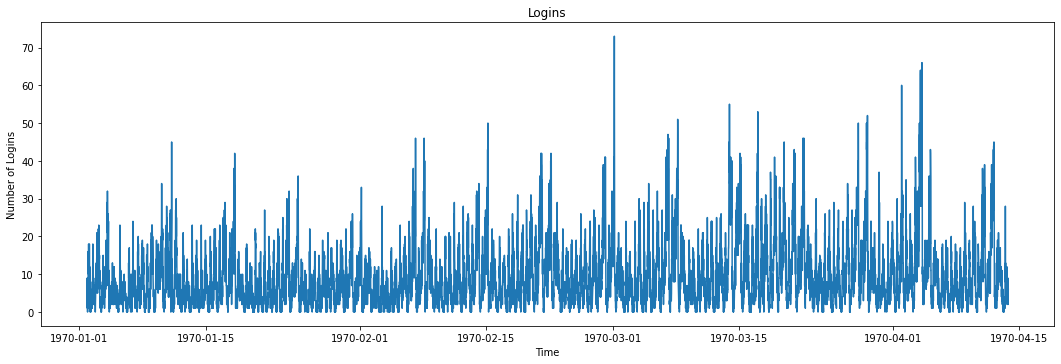

In [179]:
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.title('Logins')
# puts the data in the figure
plt.plot(logins_delta15.index, logins_delta15.values)

In [180]:
logins_delta15.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Series name: login_count
Non-Null Count  Dtype
--------------  -----
9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


It seem that there is some trend in the data, but it need to be visualized in more details. 


## Hourly trends by day of week

In [210]:
logins_delta15 = pd.DataFrame({'count': logins_delta15.values, 'hour': logins_delta15.index.hour, 'day_number': logins_delta15.index.day, 'day_of_week': logins_delta15.index.dayofweek}, index=logins_delta15.index)
logins_delta15

,count,hour,day_number,day_of_week
login_time,,,,
1970-01-01 20:00:00,2,20,1,3
1970-01-01 20:15:00,6,20,1,3
1970-01-01 20:30:00,9,20,1,3
1970-01-01 20:45:00,7,20,1,3
1970-01-01 21:00:00,1,21,1,3
...,...,...,...,...
1970-04-13 17:45:00,5,17,13,0
1970-04-13 18:00:00,5,18,13,0
1970-04-13 18:15:00,2,18,13,0


In [211]:
# group and calculate total number of logins by hour in day
login_hour = logins_delta15.groupby('hour').sum()
login_hour

,count,day_number,day_of_week
hour,,,
0,5993,5952,1236
1,6317,5952,1236
2,5800,5952,1236
3,4831,5952,1236
4,5034,5952,1236
5,2945,5952,1236
6,1138,5952,1236
7,815,5952,1236
8,818,5952,1236


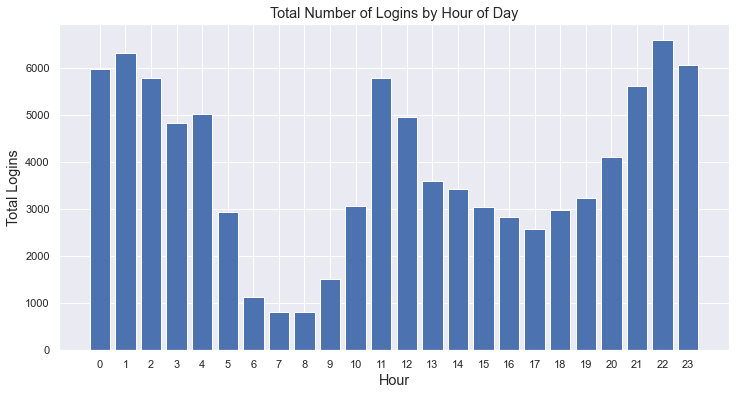

In [215]:
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.bar(login_hour.index, login_hour['count'])
_ = plt.title('Total Number of Logins by Hour of Day', size='large')
_ = plt.xlabel('Hour', size='large')
_ = plt.ylabel('Total Logins', size='large')
_ = plt.xticks(login_hour.index)

The data demonstrates that the most logins occur either during lunch time or mid night when people go back home from work or during their rest time. 

##  Number of login by days of week

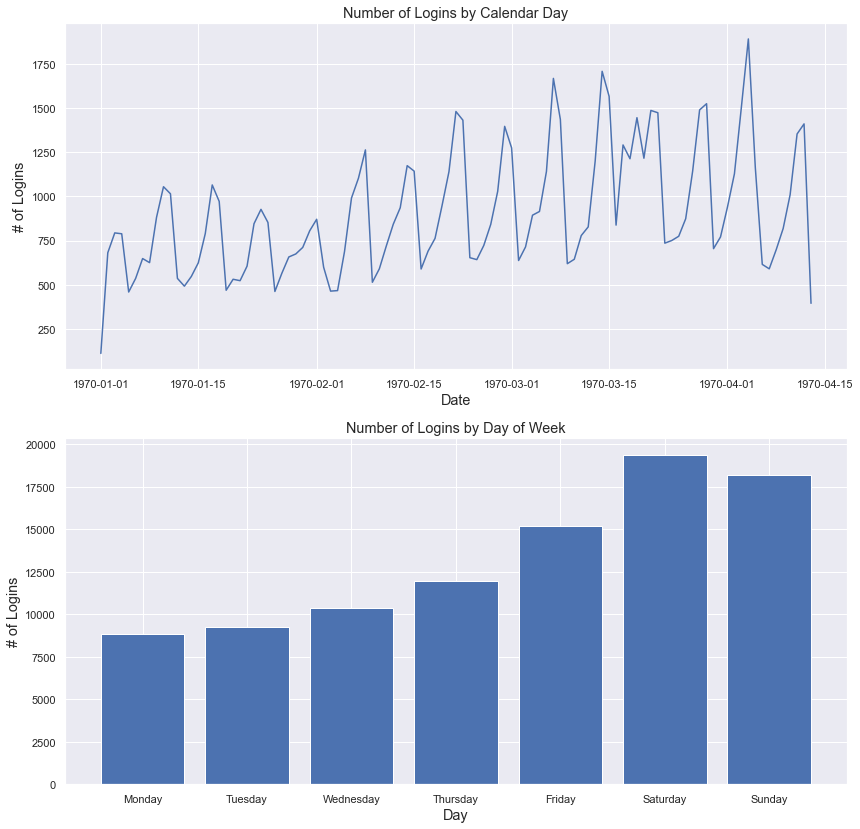

In [217]:
login_day = logins_delta15.groupby('day_of_week').sum()

_ = sns.set()
_ = plt.figure(figsize=(14,14))
_ = plt.subplot(2, 1, 1)
_ = plt.plot(logins_delta15['count'].resample('D').sum())
_ = plt.title('Number of Logins by Calendar Day', size='large')
_ = plt.xlabel('Date', size='large')
_ = plt.ylabel('# of Logins', size='large')

_ = plt.subplot(2, 1, 2)
_ = plt.bar(login_day.index, login_day['count'])
_ = plt.title('Number of Logins by Day of Week', size='large')
_ = plt.xlabel('Day', size='large')
_ = plt.ylabel('# of Logins', size='large')
_ = plt.xticks(login_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

 The above graph makes it clear that Friday has the most logins, and that the weekends(Saturdya and Sunday) are busier than the weekdays.

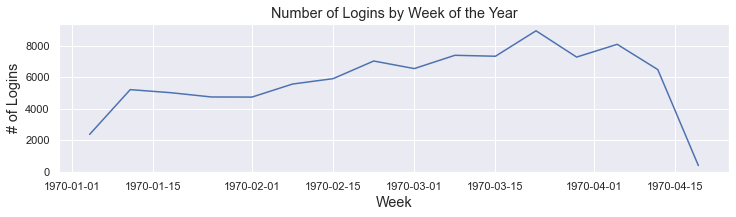

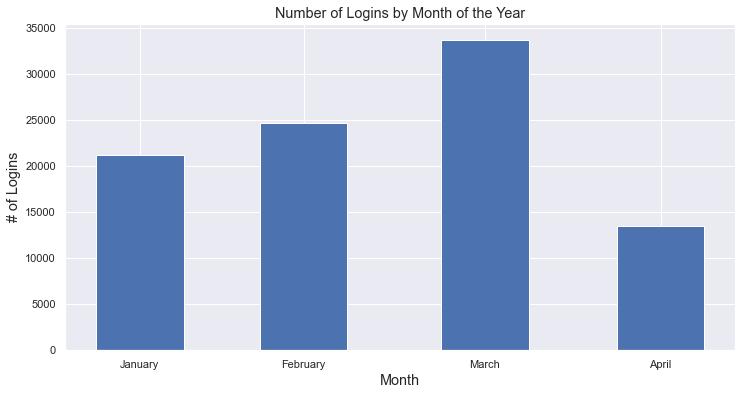

In [218]:
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(logins_delta15['count'].resample('W').sum())
_ = plt.title('Number of Logins by Week of the Year', size='large')
_ = plt.xlabel('Week', size='large')
_ = plt.ylabel('# of Logins', size='large')

_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.bar(logins_delta15['count'].resample('M').sum().index, logins_delta15['count'].resample('M').sum(), width=15.0)
_ = plt.title('Number of Logins by Month of the Year', size='large')
_ = plt.xlabel('Month', size='large')
_ = plt.ylabel('# of Logins', size='large')
_ = plt.xticks(logins_delta15['count'].resample('M').sum().index, ['January', 'February', 'March', 'April'])

 It appears that the number of logins increased gradually during the first three months of the year. This most likely has to do with the weather or begining of new year. The drop-off for April appears to be because the dataset cuts off mid-month (on 4/15).

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the observation

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

1) Paying the toll fee will reduce the cost of driver and that would encourage driver to use the bridge and work in oboth cities.

2.a) To investigate the effectiveness of reimburing the toll fee, I would set an experiment to collect data for six months. In this experiment, I would gather data from two different group. Group 1: driver recieved a toll fee and Group 2: driver does not recieved the toll fee. In order to be sure about the similarity in the amount of demands for both group, I would pay the tolls fee every two week, namely one week driver does not recieve the toll fee  and one week driver recieve the the toll fee and repeat this for six months. At the end of six months, I will look at the amount of waiting time for passenger in both city.

2.b) I would plot the distribution of waiting time for both group to see the confidence interval in rejecting one of these two hypthesis:
H0 : There is no significant differnce in waiting time for passenger in both cities
H1: There is significangt difference in waiting time for passenger in both cities . 

2.c) If ther is significant difference in waiting time in both cities, I will look to see if this differnce in waiting time increased or decreased. If the waiting time decreased, I would recoemmend paying the toll fee to the city operation. since the demand for ride is different during weekday in both cities, I would also look at the time of highest demand for each indivdiual city to see if the wating time decreased for both cities(weekdays night for Ultimate Gotham and weekdays day for Ultimate Metropolis)

# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

## Exploratory analysis, and/or visualizations t

In [448]:
#load the data 
ultimate_data = pd.read_json('ultimate_data_challenge.json')

In [449]:
ultimate_data.groupby('city').head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [450]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There is 50000 observation in data and for phone, avg_rating_of_driver, and avg_rating_by_driver there is Null value 

### Filling NAN 

In [451]:
# phone
ultimate_data['phone']= ultimate_data['phone'].fillna('unknown')

In [452]:
ultimate_data['avg_rating_of_driver'] = ultimate_data['avg_rating_of_driver'].fillna(ultimate_data['avg_rating_of_driver'].median())

In [453]:
ultimate_data['avg_rating_by_driver'] = ultimate_data['avg_rating_by_driver'].fillna(ultimate_data['avg_rating_by_driver'].median())

In [454]:
ultimate_data.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

### creating the active user 

In [455]:
# convert the date feature to datetime object
ultimate_data['signup_date']=pd.to_datetime(ultimate_data['signup_date'])
ultimate_data['last_trip_date']=pd.to_datetime(ultimate_data['last_trip_date'])

In [456]:
ultimate_data['last_trip_date'].sort_values(ascending=False)

4486    2014-07-01
43047   2014-07-01
24059   2014-07-01
40290   2014-07-01
28689   2014-07-01
           ...    
23907   2014-01-01
47804   2014-01-01
11578   2014-01-01
11573   2014-01-01
15359   2014-01-01
Name: last_trip_date, Length: 50000, dtype: datetime64[ns]

In [457]:
ultimate_data['active'] = ultimate_data['last_trip_date'] >= '2014-06-01'

In [458]:
ultimate_data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,True
49996,Astapor,1,2014-01-24,4.9,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,False
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,False


In [459]:
#What fraction of the observed users were retained?
percent_reatinedusers = ultimate_data[ultimate_data['active']==True]['active'].count()*100 / ultimate_data['active'].count()
print('The fraction of the retained users is ', percent_reatinedusers)

The fraction of the retained users is  37.608


### EDA

In [460]:
#create two groups active and inactive
ultimate_data_active= ultimate_data[ultimate_data['active'] ==True]
ultimate_data_inactive= ultimate_data[ultimate_data['active'] ==False]

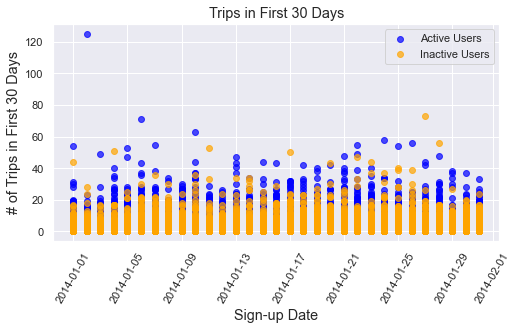

In [461]:
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(ultimate_data_active['signup_date'], ultimate_data_active['trips_in_first_30_days'], alpha=0.7, color='blue')
_ = plt.scatter(ultimate_data_inactive['signup_date'], ultimate_data_inactive['trips_in_first_30_days'], alpha=0.7, color='orange')
_ = plt.title('Trips in First 30 Days', size='large')
_ = plt.xlabel('Sign-up Date', size='large')
_ = plt.ylabel('# of Trips in First 30 Days', size='large')
_ = plt.xticks(rotation=60)
_ = plt.legend(['Active Users', 'Inactive Users'], loc='best')
_ = plt.show()

●  Active user take more trip in first 30 days compared with inactive users 


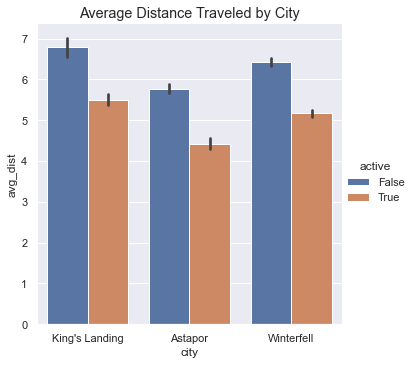

In [462]:
_ = sns.set()
_ = sns.catplot(x="city", y="avg_dist", hue='active', kind='bar', data=ultimate_data)
_ = plt.title("Average Distance Traveled by City", size='large')


●  Inactive users take trip with longer distance than active users

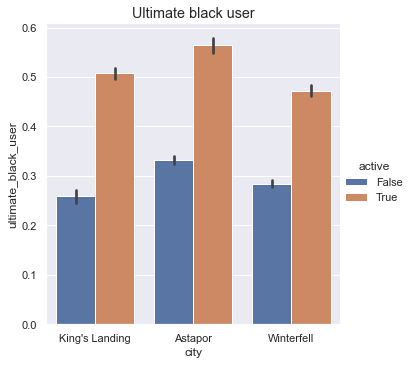

In [463]:
_ = sns.set()
_ = sns.catplot(x="city", y="ultimate_black_user", hue='active', kind='bar', data=ultimate_data)
_ = plt.title("Ultimate black user", size='large')

● There are more ultimate black users in active group than inactive users 

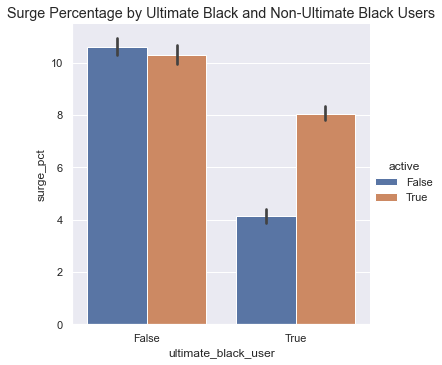

In [464]:
_ = sns.catplot(x="ultimate_black_user", y="surge_pct", hue='active', kind='bar', data=ultimate_data)
_ = plt.title("Surge Percentage by Ultimate Black and Non-Ultimate Black Users", size='large')

● The percent of trips taken with surge multiplier > 1 is higher in active ultimate black user than inactive ultimate black users 

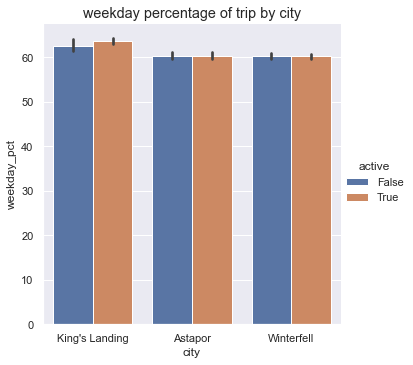

In [465]:
_ = sns.set()
_ = sns.catplot(x="city", y="weekday_pct", hue='active', kind='bar', data=ultimate_data)
_ = plt.title("weekday percentage of trip by city", size='large')

●  The percentage of trip taken in different cities are similiar between both active and inactive users . 

### Preparing the data for ML 

In [466]:
ultimate_data_ML = pd.DataFrame({'active':ultimate_data['active'].values})

In [467]:
#convert categorical data to dummies 
ultimate_data_dummies = pd.get_dummies(ultimate_data[['city','phone']])

In [468]:
ultimate_data_ML = pd.concat([ultimate_data_ML,ultimate_data_dummies],axis=1)

ultimate_data_ML['ultimate_black_user'] = ultimate_data['ultimate_black_user']

In [469]:
# Scaled the continous data  
ultimate_data_copy = ultimate_data.copy(deep=True)
ultimate_data_copy = ultimate_data_copy.drop(columns=['active','city','phone','ultimate_black_user','signup_date','last_trip_date'])

In [470]:
ultimate_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    50000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.7 MB


In [471]:
scaler = MinMaxScaler()
 
ultimate_data_copy_scaled = scaler.fit_transform(ultimate_data_copy.to_numpy())
ultimate_data_copy_scaled = pd.DataFrame(ultimate_data_copy_scaled, columns=[
  'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver'])
 
ultimate_data_copy_scaled.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000
1,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000
2,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000
3,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975
4,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975


In [472]:
ultimate_data_ML = pd.concat([ultimate_data_ML,ultimate_data_copy_scaled],axis=1)

In [473]:
#the final dataframe for machine learning 
ultimate_data_ML.head()

,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown,ultimate_black_user,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,True,0,1,0,0,1,0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000
1,False,1,0,0,1,0,0,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000
2,False,1,0,0,0,1,0,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000
3,True,0,1,0,0,1,0,True,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975
4,False,0,0,1,1,0,0,False,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975


### Predictive modeling 

In [474]:
# divide the data into label and features for use in ml models
y = ultimate_data_ML['active']
X = ultimate_data_ML.drop(columns =['active'])

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Linear Support Vector Classification

In [475]:
LSV = LinearSVC(random_state=0, tol=1e-5)
LSV.fit(X_train, y_train)
y_predict = LSV.predict(X_test)

In [476]:
print('Accuracy on training set = {}'.format(LSV.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(LSV.score(X_test, y_test)))

Accuracy on training set = 0.7202
Accuracy on test set = 0.7180666666666666


In [477]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.74      0.86      0.79      9379
        True       0.67      0.49      0.56      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



### KNeighbors

In [478]:
KN=KNeighborsClassifier()
KN.fit(X_train, y_train)
y_predict = KN.predict(X_test)

In [479]:
print('Accuracy on training set = {}'.format(KN.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(KN.score(X_test, y_test)))

Accuracy on training set = 0.8212571428571429
Accuracy on test set = 0.7431333333333333


In [420]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.78      0.81      0.80      9379
        True       0.67      0.63      0.65      5621

    accuracy                           0.74     15000
   macro avg       0.73      0.72      0.72     15000
weighted avg       0.74      0.74      0.74     15000



In [421]:
#hyper tuning the Kneighbors 
KN = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'],'algorithm': ['ball_tree', 'kd_tree', 'brute'],'leaf_size': [10, 20, 30]}
grid_search = GridSearchCV(KN, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred_knc = grid_search.predict(X_test)
print(grid_search.score(X_test, y_test))

0.7489333333333333


In [422]:
grid_search.best_score_

0.7542571840897612

In [423]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=7)

### Random forest Classifer 

In [424]:
RF= RandomForestClassifier(max_depth=3, random_state=0)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

In [425]:
print('Accuracy on training set = {}'.format(RF.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(RF.score(X_test, y_test)))

Accuracy on training set = 0.7406571428571429
Accuracy on test set = 0.7376666666666667


In [426]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.73      0.91      0.81      9379
        True       0.75      0.45      0.56      5621

    accuracy                           0.74     15000
   macro avg       0.74      0.68      0.69     15000
weighted avg       0.74      0.74      0.72     15000



In [428]:
#Hypertuning Random Forest 
param_grid = {
    'max_depth': [3, 10, 20],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 250, 500,]
}
# Create a based model
RF = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 3, scoring='accuracy' )

In [429]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [430]:
y_pred = grid_search.predict(X_test)
print(grid_search.score(X_test, y_test))

0.7831333333333333


In [431]:
grid_search.best_score_

0.7853427694429519

In [436]:
grid_search.best_params_ 

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

Between three models tried here, the Random forest has better performance in predicting the active user. 

### Final model

In [480]:
RF = RandomForestClassifier(n_estimators= 100, max_depth= 10, min_samples_split=10, min_samples_leaf=3,random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print('Accuracy on training set = {}'.format(RF.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(RF.score(X_test, y_test)))

Accuracy on training set = 0.8058857142857143
Accuracy on test set = 0.7831333333333333


In [481]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.86      0.83      9379
        True       0.74      0.66      0.69      5621

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



By tuning the Random Forest Classifier, the overall accuracy on test data was improved by 4%. On inactive user, the precision was improved by 8%  and  recall improved by 5%. On active user, the precison remained same approximately but recall improved by ~20 %. It means that the model after tuninig has significantly lower false activer user.  

In [482]:
#  The importance of features 
ultimate_features = pd.DataFrame({'importance': RF.feature_importances_}, index=ultimate_data_ML.columns[1:])
ultimate_features.sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.163672
surge_pct,0.138068
weekday_pct,0.135646
city_King's Landing,0.108926
avg_surge,0.098548
ultimate_black_user,0.059659
trips_in_first_30_days,0.056443
phone_Android,0.053425
avg_dist,0.052344
phone_iPhone,0.039499


Based on the result from machine learning model, the most important features in long term rider retention are amount of surge, percent of the user’s trips occurring during a weekday, andn ultimate black user, amount of trips in the fisrt 30 days, and average distance. 

I recommend ultimate consider promotion of reducing price for new users, or for specific distance, or ultimate black car trip when demand is high. 


